In [ ]:
# This code is retrieved from Michel's notebook

In [2]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
import osmnx as ox # for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations
from shapely.geometry import Polygon
import numpy as np
import pandana as pdna
import os
from tqdm import tqdm

In [3]:
# RUN ONLY ONCE TO SAVE THE GRAPHS - ALREADY DONE

# graphs = {}

# # specify parameters for the analysis
# walk_time = 15  # max walking horizon in minutes
# walk_speed = 5  # km per hour
# walk_time_sec = walk_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx

# # Loop through the neighborhoods
# for neighborhood in tqdm(neighbourhoods):
#     # Create a graph for the current neighborhood
#     G_walk_neighborhood = ox.graph_from_place(neighborhood, network_type='walk') # type of transportation is set here

#     for u, v, data in G_walk_neighborhood.edges(data=True):
#         data['speed_kph'] = walk_speed
#     G_walk_neighborhood = ox.add_edge_travel_times(G_walk_neighborhood) # this computes the travel time in seconds based on the 'speed_kph' column

# # caro path
#     # ox.save_graphml(G_walk_neighborhood, f"/Users/caro/Desktop/SPRING24/GDS/PROJECT/graphs/G_walk_{neighborhood}.graphml") # save graph per neighbourhood
# # michel path
#     ox.save_graphml(G_walk_neighborhood, f"../graphs/G_walk_{neighborhood}.graphml") # save graph per neighbourhood
#     # Store the graph in the dictionary using the neighborhood name as the key
#     graphs[neighborhood] = G_walk_neighborhood

In [4]:
graphs = {}
graphs_dir = '/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/graphs'
#graphs_dir = '../graphs'

if graphs == {}:
    for file_name in tqdm(os.listdir(graphs_dir)):
        if file_name.endswith(".graphml"):
            neighborhood = file_name.replace("G_walk_", "").replace(".graphml", "")
            file_path = os.path.join(graphs_dir, file_name)
            G_walk_neighborhood = ox.load_graphml(file_path)
            graphs[neighborhood] = G_walk_neighborhood

100%|██████████| 18/18 [00:53<00:00,  2.95s/it]


In [5]:
pandanas = {}

if pandanas == {}:
    # Build Pandana network for each neighborhood
    for neighborhood, graph in tqdm(graphs.items()):
        graph = ox.project_graph(graph, to_crs='EPSG:25832')
        nodes = ox.graph_to_gdfs(graph, edges=False)[['x', 'y']]
        edges = ox.graph_to_gdfs(graph, nodes=False).reset_index()[['u', 'v', 'travel_time']]

        network = pdna.Network(node_x=nodes['x'],
                                node_y=nodes['y'], 
                                edge_from=edges['u'],
                                edge_to=edges['v'],
                                edge_weights=edges[['travel_time']])
        
        pandanas[neighborhood] = network

  6%|▌         | 1/18 [00:08<02:23,  8.43s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 9639
Setting CH edge vector of size 30838
Range graph removed 31100 edges of 61676
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 11%|█         | 2/18 [00:17<02:19,  8.74s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 14281
Setting CH edge vector of size 46136
Range graph removed 46506 edges of 92272
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 17%|█▋        | 3/18 [00:29<02:33, 10.26s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 14970
Setting CH edge vector of size 48624
Range graph removed 48876 edges of 97248
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 22%|██▏       | 4/18 [00:31<01:39,  7.12s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 2588
Setting CH edge vector of size 8290
Range graph removed 8386 edges of 16580
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 28%|██▊       | 5/18 [00:37<01:25,  6.59s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 9720
Setting CH edge vector of size 31244
Range graph removed 31622 edges of 62488
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 33%|███▎      | 6/18 [00:45<01:23,  6.97s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 12319
Setting CH edge vector of size 38440
Range graph removed 38976 edges of 76880
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 39%|███▉      | 7/18 [00:49<01:07,  6.09s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3382
Setting CH edge vector of size 10774
Range graph removed 10912 edges of 21548
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 44%|████▍     | 8/18 [00:52<00:51,  5.20s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3200
Setting CH edge vector of size 9782
Range graph removed 9918 edges of 19564
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 50%|█████     | 9/18 [00:55<00:39,  4.37s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3603
Setting CH edge vector of size 11218
Range graph removed 11360 edges of 22436
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 56%|█████▌    | 10/18 [00:57<00:29,  3.67s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3795
Setting CH edge vector of size 11622
Range graph removed 11734 edges of 23244
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 61%|██████    | 11/18 [01:08<00:42,  6.11s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 10411
Setting CH edge vector of size 33610
Range graph removed 33746 edges of 67220
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 67%|██████▋   | 12/18 [01:25<00:56,  9.37s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 8890
Setting CH edge vector of size 29956
Range graph removed 30224 edges of 59912
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 72%|███████▏  | 13/18 [01:26<00:34,  6.80s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 1552
Setting CH edge vector of size 4430
Range graph removed 4700 edges of 8860
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 78%|███████▊  | 14/18 [01:35<00:29,  7.40s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 13822
Setting CH edge vector of size 43760
Range graph removed 44322 edges of 87520
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 83%|████████▎ | 15/18 [01:37<00:16,  5.66s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3761
Setting CH edge vector of size 11500
Range graph removed 11874 edges of 23000
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 89%|████████▉ | 16/18 [01:47<00:14,  7.11s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 16731
Setting CH edge vector of size 55202
Range graph removed 55584 edges of 110404
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 94%|█████████▍| 17/18 [01:48<00:05,  5.20s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 1441
Setting CH edge vector of size 4694
Range graph removed 4774 edges of 9388
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

100%|██████████| 18/18 [01:52<00:00,  6.24s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 6417
Setting CH edge vector of size 20386
Range graph removed 20608 edges of 40772
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [6]:
# store all graphs already
#G_walk = ox.graph_from_place('Anjou, Montreal, Quebec, Canada', network_type='walk')
#G_bike = ox.graph_from_place('Anjou, Montreal, Quebec, Canada', network_type='bike')
#G_drive = ox.graph_from_place('Anjou, Montreal, Quebec, Canada', network_type='drive')

In [7]:
place = 'Montreal, Canada'
list_of_amenities = ['restaurant', 'cafe', 'pharmacy']
tags = {'amenity': list_of_amenities}

walk_time = 15  # max walking horizon in minutes
walk_speed = 5  # km per hour
walk_time_sec = walk_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx


In [10]:
amenities = ox.features_from_place(place, tags=tags)
amenities = amenities.to_crs('EPSG:25832')

# Dictionary to store centroids for each amenity
centroids_per_amenity = {}

# Loop through each amenity category
for amenity in list_of_amenities:
    # Filter amenities for the current category
    amenities_category = amenities[amenities['amenity'] == amenity]
    # Calculate centroids for the current category
    centroids_category = amenities_category.centroid
    # Store centroids for the current category in the dictionary
    centroids_per_amenity[amenity] = centroids_category

graphs_dir = '/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/graphs'
#graphs_dir = '../graphs'

walk_graphs = {}
for file_name in tqdm(os.listdir(graphs_dir)):
    if file_name.endswith(".graphml"):
        neighborhood = file_name.replace("G_walk_", "").replace(".graphml", "")
        file_path = os.path.join(graphs_dir, file_name)
        G_walk_neighborhood = ox.load_graphml(file_path)
        graphs[neighborhood] = G_walk_neighborhood
            

walk_pandanas = {}
# Build Pandana network for each neighborhood
for neighborhood, graph in tqdm(graphs.items()):
    graph = ox.project_graph(graph, to_crs='EPSG:25832')
    nodes = ox.graph_to_gdfs(graph, edges=False)[['x', 'y']]
    edges = ox.graph_to_gdfs(graph, nodes=False).reset_index()[['u', 'v', 'travel_time']]
    
    network = pdna.Network(node_x=nodes['x'],
                            node_y=nodes['y'], 
                            edge_from=edges['u'],
                            edge_to=edges['v'],
                            edge_weights=edges[['travel_time']])
    
    pandanas[neighborhood] = network


walking_distances = {}  # Initialize an empty dictionary to store distances for each amenity

for amenity in list_of_amenities:
    walking_distances[amenity] = {}

    for neighborhood, pandana in tqdm(pandanas.items()):
        # Set points of interest (POIs) for the current amenity in the current neighborhood
        pandana.set_pois(category=amenity,  # Set the current amenity category dynamically
                         maxdist=walk_time_sec,
                         maxitems=3,
                         x_col=centroids_per_amenity[amenity].x,  # Use the centroid of the current amenity
                         y_col=centroids_per_amenity[amenity].y)
        
        # Find the nearest POIs for the current amenity in the current neighborhood
        distances = pandana.nearest_pois(distance=walk_time_sec,
                                          category=amenity,  # Set the current amenity category dynamically
                                          num_pois=3)
        
        # Convert travel time from seconds to minutes
        distances['travel_time'] = distances[1] / 60
        
        # Store the distances for the current amenity in the current neighborhood
        walking_distances[amenity][neighborhood] = distances


  6%|▌         | 1/18 [00:07<02:10,  7.66s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 9639
Setting CH edge vector of size 30838
Range graph removed 31100 edges of 61676
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 11%|█         | 2/18 [00:17<02:18,  8.66s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 14281
Setting CH edge vector of size 46136
Range graph removed 46506 edges of 92272
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 17%|█▋        | 3/18 [00:30<02:42, 10.84s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 14970
Setting CH edge vector of size 48624
Range graph removed 48876 edges of 97248
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 22%|██▏       | 4/18 [00:31<01:39,  7.12s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 2588
Setting CH edge vector of size 8290
Range graph removed 8386 edges of 16580
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 28%|██▊       | 5/18 [00:40<01:38,  7.57s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 9720
Setting CH edge vector of size 31244
Range graph removed 31622 edges of 62488
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 33%|███▎      | 6/18 [00:47<01:28,  7.34s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 12319
Setting CH edge vector of size 38440
Range graph removed 38976 edges of 76880
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 39%|███▉      | 7/18 [00:48<01:01,  5.55s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3382
Setting CH edge vector of size 10774
Range graph removed 10912 edges of 21548
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 44%|████▍     | 8/18 [00:50<00:42,  4.26s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3200
Setting CH edge vector of size 9782
Range graph removed 9918 edges of 19564
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 50%|█████     | 9/18 [00:52<00:31,  3.50s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3603
Setting CH edge vector of size 11218
Range graph removed 11360 edges of 22436
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 56%|█████▌    | 10/18 [00:54<00:25,  3.22s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3795
Setting CH edge vector of size 11622
Range graph removed 11734 edges of 23244
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 61%|██████    | 11/18 [01:03<00:33,  4.81s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 10411
Setting CH edge vector of size 33610
Range graph removed 33746 edges of 67220
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 67%|██████▋   | 12/18 [01:13<00:38,  6.34s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 8890
Setting CH edge vector of size 29956
Range graph removed 30224 edges of 59912
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 72%|███████▏  | 13/18 [01:13<00:23,  4.62s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 1552
Setting CH edge vector of size 4430
Range graph removed 4700 edges of 8860
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 78%|███████▊  | 14/18 [01:23<00:24,  6.10s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 13822
Setting CH edge vector of size 43760
Range graph removed 44322 edges of 87520
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 83%|████████▎ | 15/18 [01:25<00:14,  4.76s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3761
Setting CH edge vector of size 11500
Range graph removed 11874 edges of 23000
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 89%|████████▉ | 16/18 [01:37<00:14,  7.06s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 16731
Setting CH edge vector of size 55202
Range graph removed 55584 edges of 110404
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 94%|█████████▍| 17/18 [01:38<00:05,  5.18s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 1441
Setting CH edge vector of size 4694
Range graph removed 4774 edges of 9388
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

100%|██████████| 18/18 [01:41<00:00,  5.63s/it]


Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 6417
Setting CH edge vector of size 20386
Range graph removed 20608 edges of 40772
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


  0%|          | 0/18 [00:00<?, ?it/s]/Users/caro/Library/Python/3.10/lib/python/site-packages/pandana/network.py:753: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
/Users/caro/Library/Python/3.10/lib/python/site-packages/pandana/network.py:761: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):
  6%|▌         | 1/18 [00:00<00:04,  3.42it/s]/Users/caro/Library/Python/3.10/lib/python/site-packages/pandana/network.py:753: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
/Users/caro/Library/Python/3.10/lib/python/site

In [16]:
walking_distances.keys()

dict_keys(['restaurant', 'cafe', 'pharmacy'])

In [18]:
walking_distances['pharmacy']['Anjou, Montreal, Canada']

,1,2,3,travel_time
osmid,,,,
224886238,900.000000,900.000000,900.000000,15.000000
596644170,900.000000,900.000000,900.000000,15.000000
4502353385,900.000000,900.000000,900.000000,15.000000
224911443,429.399994,507.399994,644.500000,7.156667
8875463868,438.899994,516.900024,654.000000,7.315000
...,...,...,...,...
11662037419,223.699997,223.699997,296.200012,3.728333
11662037462,306.000000,306.000000,378.500000,5.100000
11662037420,244.399994,244.399994,316.899994,4.073333


In [17]:
walking_distances['cafe']['Anjou, Montreal, Canada']

,1,2,3,travel_time
osmid,,,,
224886238,348.299988,900.000000,900.000000,5.805000
596644170,547.799988,900.000000,900.000000,9.130000
4502353385,151.600006,900.000000,900.000000,2.526667
224911443,412.200012,644.500000,644.500000,6.870000
8875463868,402.700012,654.000000,654.000000,6.711667
...,...,...,...,...
11662037419,296.200012,296.200012,296.200012,4.936667
11662037462,378.500000,378.500000,378.500000,6.308333
11662037420,316.899994,316.899994,316.899994,5.281667


In [14]:
distances_df = pd.DataFrame()

# Iterate over each amenity in the list of amenities
for amenity in list_of_amenities:
    # Get the distances for the current amenity
    distances = walking_distances[amenity]
    print(distances)
    # Check if the distances dictionary is empty
    if distances:
        # Create a DataFrame for the distances of the current amenity
        df = pd.DataFrame(distances, index=[0])
        # Transpose to make neighborhoods as rows
        df = df.T
        # Rename the columns to include the amenity name
        df.columns = [f'{amenity}_1', f'{amenity}_2', f'{amenity}_3', f'{amenity}_travel_time']
        # Add a column for the neighborhood
        df['neighborhood'] = df.index
        # Set the neighborhood as the index
        df.set_index('neighborhood', inplace=True)
        # Concatenate the DataFrame for the current amenity with the overall distances DataFrame
        distances_df = pd.concat([distances_df, df], axis=1)



{'Mercier–Hochelaga-Maisonneuve, Montreal, Canada':                       1           2           3  travel_time
osmid                                                       
26232893     514.799988  703.400024  703.400024     8.580000
11495723273  525.700012  705.200012  714.299988     8.761667
11495723274  507.600006  696.200012  696.200012     8.460000
11495717756  544.500000  733.099976  733.099976     9.075000
30914720     292.799988  307.100006  451.899994     4.880000
...                 ...         ...         ...          ...
11862799553  821.299988  900.000000  900.000000    13.688333
11862799552  834.900024  900.000000  900.000000    13.915000
11862799555  834.099976  900.000000  900.000000    13.901666
11862799564  828.500000  900.000000  900.000000    13.808333
11862799568  842.599976  900.000000  900.000000    14.043333

[9639 rows x 4 columns], 'Côte-des-Neiges–Notre-Dame-de-Grâce, Montreal, Canada':                       1           2           3  travel_time
osmid      

ValueError: Data must be 1-dimensional

In [ ]:
distances_df.head()

In [58]:
G_walk_anjou = graphs['Anjou, Montreal, Canada'] # access one graph
pandana_anjou = pandanas['Anjou, Montreal, Canada'] # access one pandana network
walking_distances_anjou = walking_distances['Anjou, Montreal, Canada']

G_walk_villemarie = graphs['Ville-Marie, Montreal, Canada'] # access one graph
pandana_villemarie = pandanas['Ville-Marie, Montreal, Canada'] # access one pandana network
walking_distances_illemarie = walking_distances['Ville-Marie, Montreal, Canada']

In [59]:
# function for plotting
def plot_neighborhood_graph(mode_of_transportation_graph, mode_of_transportation_distances, neighbourhood):
    # Load the graph from the specified place and network type
    G = mode_of_transportation_graph
    # CRS
    G_proj = ox.project_graph(G)
    
    distances = mode_of_transportation_distances[f"{neighbourhood}, Montreal, Canada"]
    
    # Plot the graph with a light background
    fig, ax = ox.plot_graph(G_proj, figsize=(10, 8), bgcolor='white', edge_color='#CCCCCC', edge_linewidth=0.5, node_size=0, show=False, close=False)
    
    # Assuming 'nodes_anjou' is a DataFrame containing node positions and 'distances_anjou' contains the data to plot
    nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
    
    # Scatter plot on the same Axes instance
    sc = ax.scatter(x=nodes_proj["x"], y=nodes_proj["y"], c=distances['travel_time'], s=30, cmap='inferno_r', alpha=0.8)
    
    # Add colorbar
    plt.colorbar(sc, ax=ax, shrink=0.7)
    
    # Show the plot
    plt.show()


In [60]:
walking_distances.keys()

dict_keys(['Mercier–Hochelaga-Maisonneuve, Montreal, Canada', 'Côte-des-Neiges–Notre-Dame-de-Grâce, Montreal, Canada', 'Rosemont–La Petite-Patrie, Montreal, Canada', 'Outremont, Montreal, Canada', 'Le Sud-Ouest, Montreal, Canada', 'Saint-Laurent, Montreal, Canada', 'Verdun, Montreal, Canada', 'Anjou, Montreal, Canada', 'Saint-Léonard, Montreal, Canada', 'Lachine, Montreal, Canada', 'Villeray–Saint-Michel–Parc-Extension, Montreal, Canada', 'Le Plateau-Mont-Royal, Montreal, Canada', "L'Île_Bizard_Sainte_Geneviève, Montreal, Canada", 'Ville-Marie, Montreal, Canada', 'Rivière-des-Prairies–Pointe-aux-Trembles, Montreal, Canada', 'Ahuntsic-Cartierville, Montreal, Canada', 'Montréal-Nord, Montreal, Canada', 'LaSalle, Montreal, Canada'])

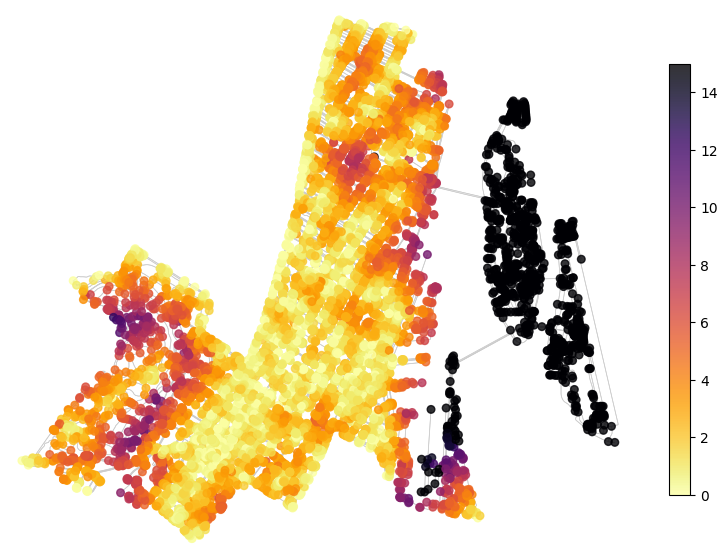

In [61]:
# example usage
plot_neighborhood_graph(G_walk_villemarie, walking_distances, 'Ville-Marie')

In [24]:
walking_distances['Anjou, Montreal, Canada']['travel_time'].mean() # restaurants

6.589771848365432

In [36]:
walking_distances['Ville-Marie, Montreal, Canada']['travel_time'].mean() # restaurants

2.2069084312059934

In [62]:
walking_distances['Anjou, Montreal, Canada']['travel_time'].mean() # cafes

7.245119159491112

In [63]:
walking_distances['Ville-Marie, Montreal, Canada']['travel_time'].mean() # cafes

3.314090150087297

In [ ]:
df = pd.DataFrame(walking_distances) # Now df contains all the walking distances for each amenity in each neighborhood
neighborhood = 'Mercier–Hochelaga-Maisonneuve, Montreal, Canada'
amenity = 'restaurant'

# Filter the DataFrame based on the specified neighborhood and amenity
filtered_distances = df.loc[neighborhood, amenity]